In [1]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# EFFECT OF SPARSITY

In [16]:
nsim=6
sparsities=[0.06,0.08,0.1,0.2,0.3,0.5]

In [17]:
#data import
MJA=[]
MJB=[]
MJAB=[]
for i in range(nsim):
    mja=load("s"+str(i+1)+"/mJA.npy")
    mjb=load("s"+str(i+1)+"/mJB.npy")
    mjab=load("s"+str(i+1)+"/mJAB.npy")
    MJA.append(mja)
    MJB.append(mjb)
    MJAB.append(mjab)

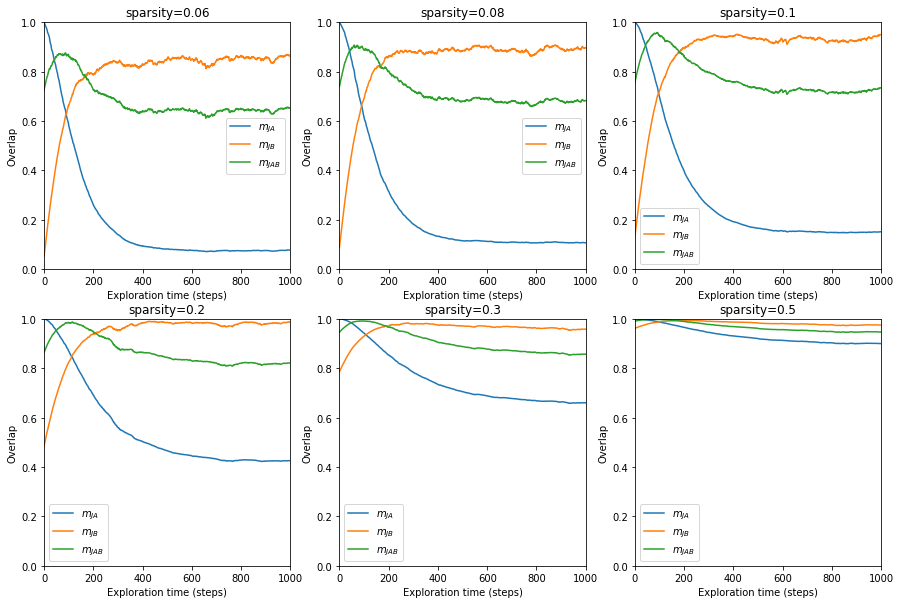

In [18]:
#PLOTTING: trajectories
figure(figsize=(15,10))
for i in range(nsim):
    subplot(2,3,i+1)
    x=asarray(range(len(MJA[i])))
    plot(x,MJA[i],label=r"$m_{JA}$")
    plot(x,MJB[i],label=r"$m_{JB}$")
    plot(x,MJAB[i],label=r"$m_{JAB}$")
    axis([0,1000,0,1])
    xlabel("Exploration time (steps)")
    ylabel("Overlap")
    title("sparsity="+str(sparsities[i]))
    legend()

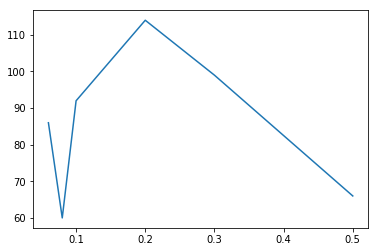

In [20]:
#Argmax of MJAB
tmax=[]
for i in range(nsim):
    tmax.append(argmax(MJAB[i]))
plot(sparsities,tmax)

Time of maximal MJAB seems quite constant with sparsity.
It also seem to correspond to the point MJA=MJB. This has to be checked and maybe is possible to demonstrate analitically.

In [25]:
MJA[2][92]

0.7350227063611462

In [24]:
MJB[2][92]

0.7031379298865663

In [23]:
argmax(MJAB[2])

92

# SINGLE DYNAMICS PLOT

In [26]:
ma=load("s3/mJA.npy")[:90]
mb=load("s3/mJB.npy")[:90]
mab=load("s3/mJAB.npy")[:90]

In [27]:
t=asarray(range(len(ma)))

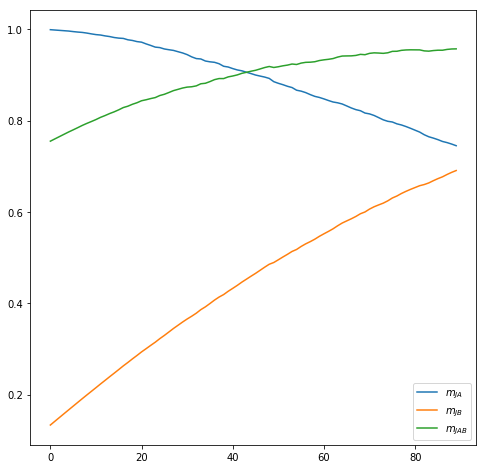

In [28]:
figure(figsize=(8,8))
plot(t,ma,label=r"$m_{JA}$")
plot(t,mb,label=r"$m_{JB}$")
plot(t,mab,label=r"$m_{JAB}$")
legend()

# ATTRACTOR DYNAMICS ANALYSIS

The systems exihibit 2 attractors between the first 2 crossing points